# Import

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

# Read Data 

In [2]:
patient=pd.read_csv('./data/patient.csv')
route=pd.read_csv('./data/route.csv')
time=pd.read_csv('./data/time.csv')

# Pandas Profiling

In [3]:
# pr1=patient.profile_report()
# pr1.to_file('./pr_patient.html') 
# pr2=route.profile_report()
# pr2.to_file('./pr_route.html')
# pr3=time.profile_report()
# pr3.to_file('./pr_time.html')

In [4]:
print(len(patient), len(route), len(time))

6285 102 46


In [34]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 14 columns):
id                  6284 non-null float64
sex                 421 non-null object
birth_year          408 non-null float64
country             6283 non-null object
region              409 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      6284 non-null object
released_date       38 non-null object
deceased_date       23 non-null object
state               6284 non-null object
dtypes: float64(5), object(9)
memory usage: 687.5+ KB


In [5]:
patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [104]:
col=patient.columns
for co in col:
    print(co,patient[co].unique(),'\n')

id [1.000e+00 2.000e+00 3.000e+00 ... 6.283e+03 6.284e+03       nan] 

sex ['female' 'male' nan] 

birth_year [1984. 1964. 1966. 1987. 1991. 1957. 1992. 1995. 1971. 1980. 1977. 1982.
 1999. 1983. 1978. 1960. 1973. 1962. 1946. 1968. 1989. 1938. 1952. 1959.
 2009. 1996. 1994. 1972. 1963. 1943. 1951. 1974. 1948. 1944. 1961. 1945.
 1990. 1986. 1970. 1998. 1981. 2000. 1997. 1965. 1955. 1956. 1979.   nan
 1953. 1941. 1936. 1988. 1985. 2001. 1958. 1975. 1993. 1954. 1969. 1949.
 1950. 2018. 1976. 1967. 1934. 2004. 2011. 1947. 1942. 1937. 1935. 1932.
 1940. 2005. 2003. 2007. 2013.] 

country ['China' 'Korea' nan 'Mongolia'] 

region ['filtered at airport' 'capital area' 'Jeollabuk-do' 'Gwangju' 'Daegu'
 'Gyeongsangbuk-do' nan 'Jeju-do' 'Busan' 'Daejeon' 'Chungcheongbuk-do'
 'Chungcheongnam-do' 'Ulsan' 'Gangwon-do' 'Jeollanam-do'] 

group [nan 'Shincheonji Church' 'Cheongdo Daenam Hospital'
 "Eunpyeong St. Mary's Hospital" 'Onchun Church' 'Pilgrimage'
 'Myungsung church'] 

infection_reason ['vi

In [107]:
for co in col:
    print(co,'counting NULL:', patient[co].isnull().sum())

id counting NULL: 1
sex counting NULL: 5864
birth_year counting NULL: 5877
country counting NULL: 2
region counting NULL: 5876
group counting NULL: 6202
infection_reason counting NULL: 6139
infection_order counting NULL: 6250
infected_by counting NULL: 6215
contact_number counting NULL: 6235
confirmed_date counting NULL: 1
released_date counting NULL: 6247
deceased_date counting NULL: 6262
state counting NULL: 1


In [91]:
s1=patient.pivot_table(index='birth_year', columns='country', aggfunc='size')

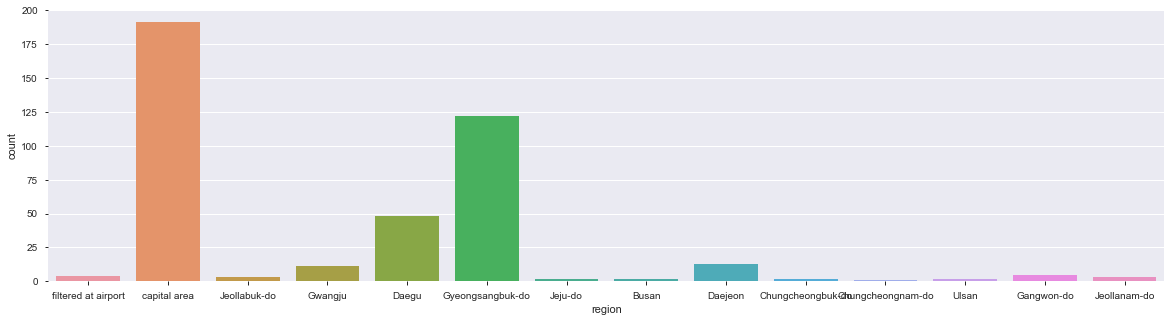

In [92]:
plt.figure(figsize=(20,5))
sns.countplot(x="region", data=patient)

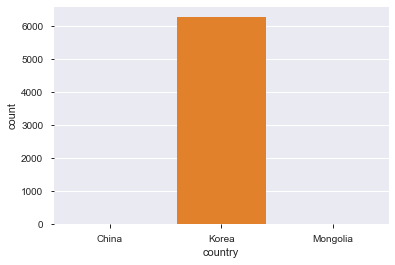

In [93]:
sns.countplot(x="country", data=patient)

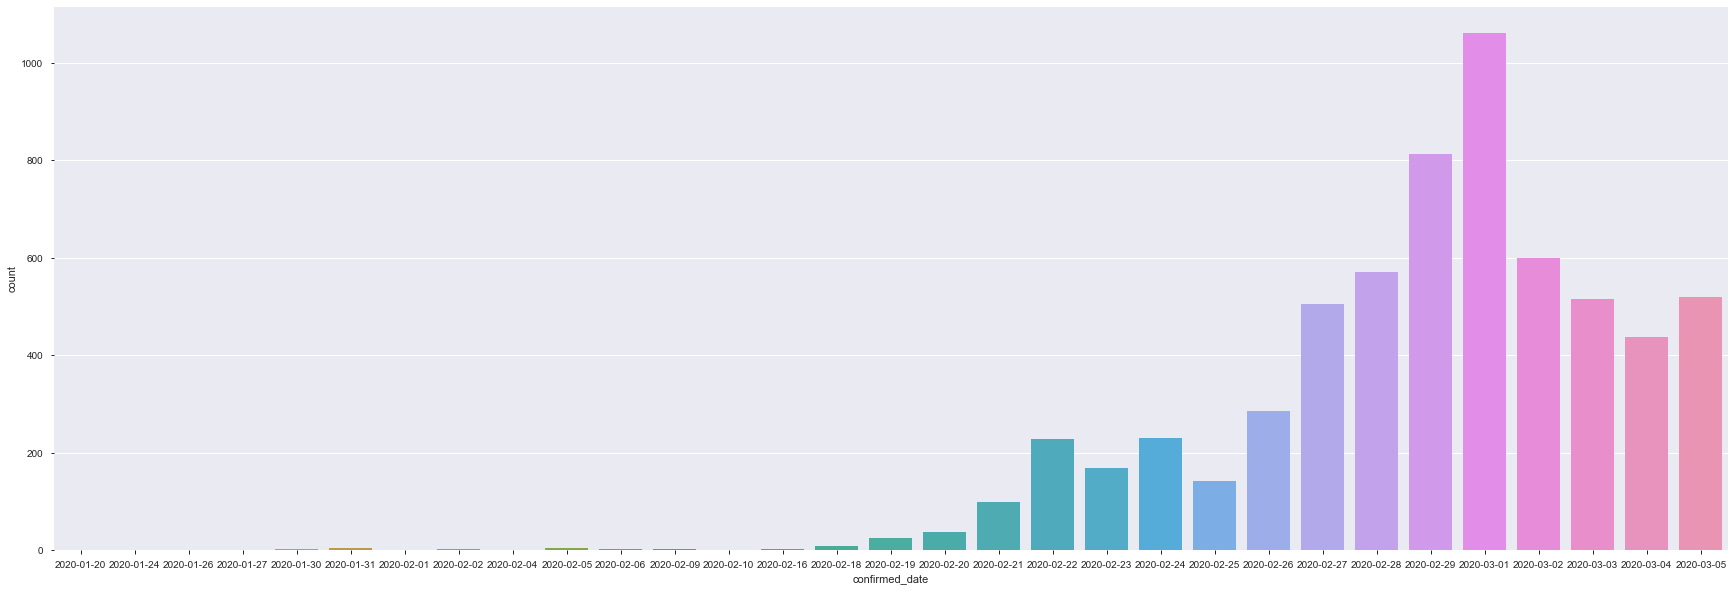

In [94]:
plt.figure(figsize=(30,10))
sns.countplot(x="confirmed_date", data=patient)

In [95]:
print(patient.columns)

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')


'id', 'sex', 'birth_year', 'country', 'region', 'group','infection_reason',   
'infection_order', 'infected_by', 'contact_number','confirmed_date',   
'released_date', 'deceased_date', 'state'

In [96]:
print(patient['infection_reason'].value_counts(), '\n\n',patient['infection_reason'].isnull().sum())

contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
contact with patient in Singapore     2
residence in Wuhan                    2
visit to Thailand                     2
visit to China                        1
visit to Cheongdo Daenam Hospital     1
contact with patient in Japan         1
visit to Shincheonji Church           1
visit to Vietnam                      1
 visit to China                       1
visit to Italy                        1
visit to Japan                        1
Name: infection_reason, dtype: int64 

 6139


In [97]:
patient['country'].value_counts()

Korea       6274
China          8
Mongolia       1
Name: country, dtype: int64

In [98]:
print(patient['region'].value_counts(), '\n\n', patient['region'].isnull().sum())

capital area           191
Gyeongsangbuk-do       122
Daegu                   48
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeollanam-do             3
Jeollabuk-do             3
Chungcheongbuk-do        2
Busan                    2
Ulsan                    2
Jeju-do                  2
Chungcheongnam-do        1
Name: region, dtype: int64 

 5876


In [99]:
print(patient['group'].value_counts(), '\n\n', patient['group'].isnull().sum())

Shincheonji Church               53
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Myungsung church                  1
Onchun Church                     1
Name: group, dtype: int64 

 6202


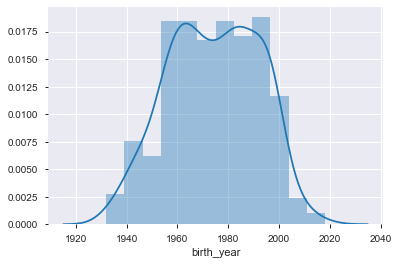

In [100]:
sns.distplot(patient['birth_year'],kde=True)

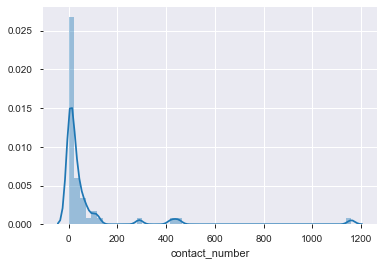

In [101]:
sns.distplot(patient['contact_number'], kde=True)

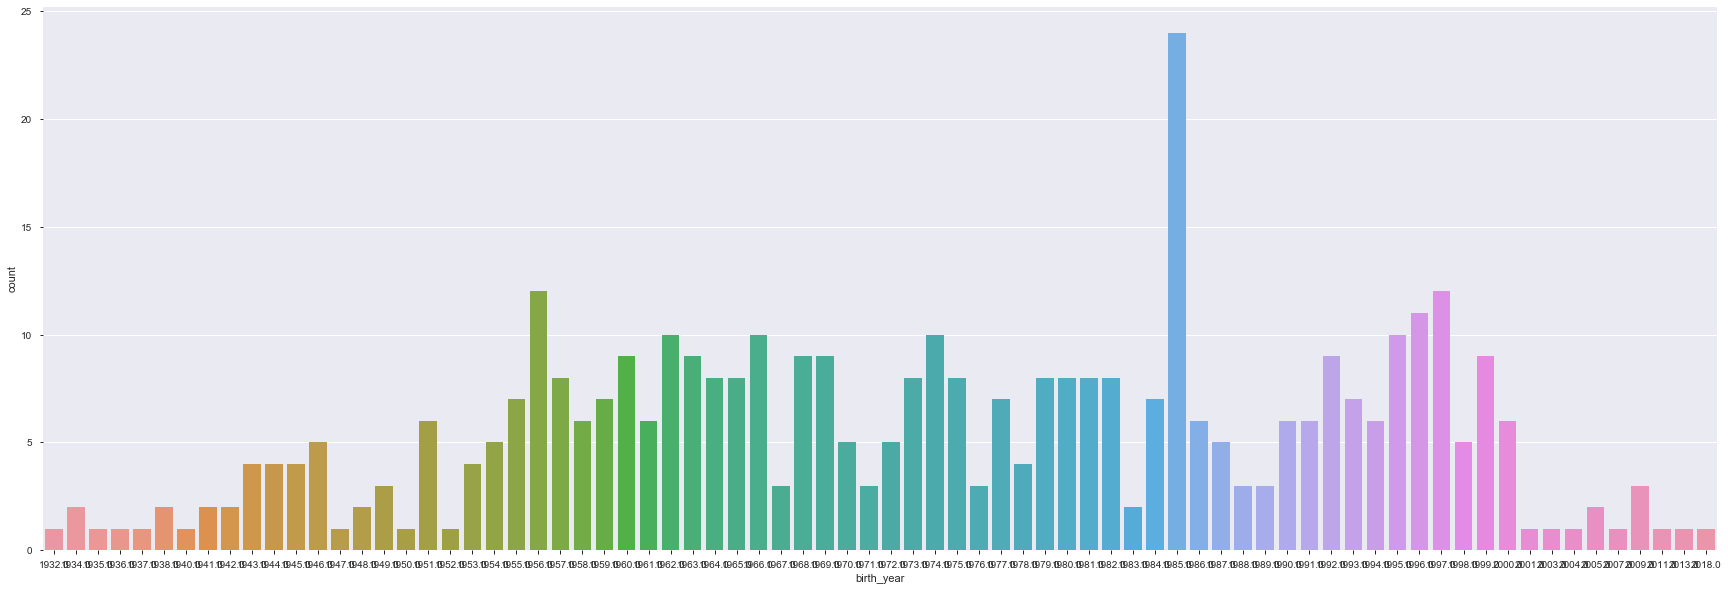

In [102]:
plt.figure(figsize=(30,10))
sns.countplot(x='birth_year',data=patient)

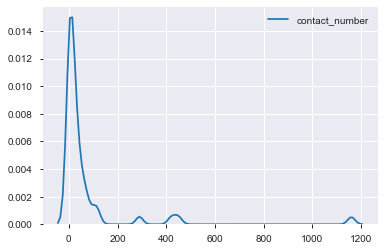

In [25]:
sns.kdeplot(patient['contact_number'])

In [27]:
patient['region'].value_counts()

capital area           191
Gyeongsangbuk-do       122
Daegu                   48
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeollanam-do             3
Jeollabuk-do             3
Chungcheongbuk-do        2
Busan                    2
Ulsan                    2
Jeju-do                  2
Chungcheongnam-do        1
Name: region, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 14 columns):
id                  6284 non-null float64
sex                 421 non-null object
birth_year          408 non-null float64
country             6283 non-null object
region              409 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      6284 non-null object
released_date       38 non-null object
deceased_date       23 non-null object
state               6284 non-null object
dtypes: float64(5), object(9)
memory usage: 687.5+ KB


In [31]:
patient['sex'].value_counts()

female    214
male      207
Name: sex, dtype: int64

In [ ]:
route.head()

In [113]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
id           102 non-null int64
date         102 non-null object
province     102 non-null object
city         102 non-null object
visit        102 non-null object
latitude     102 non-null float64
longitude    102 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.7+ KB


In [114]:
print(route.columns)

Index(['id', 'date', 'province', 'city', 'visit', 'latitude', 'longitude'], dtype='object')


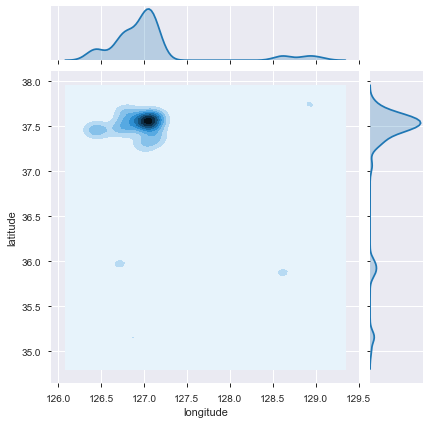

In [126]:
sns.jointplot(x='longitude',y='latitude', data=route, kind="kde")

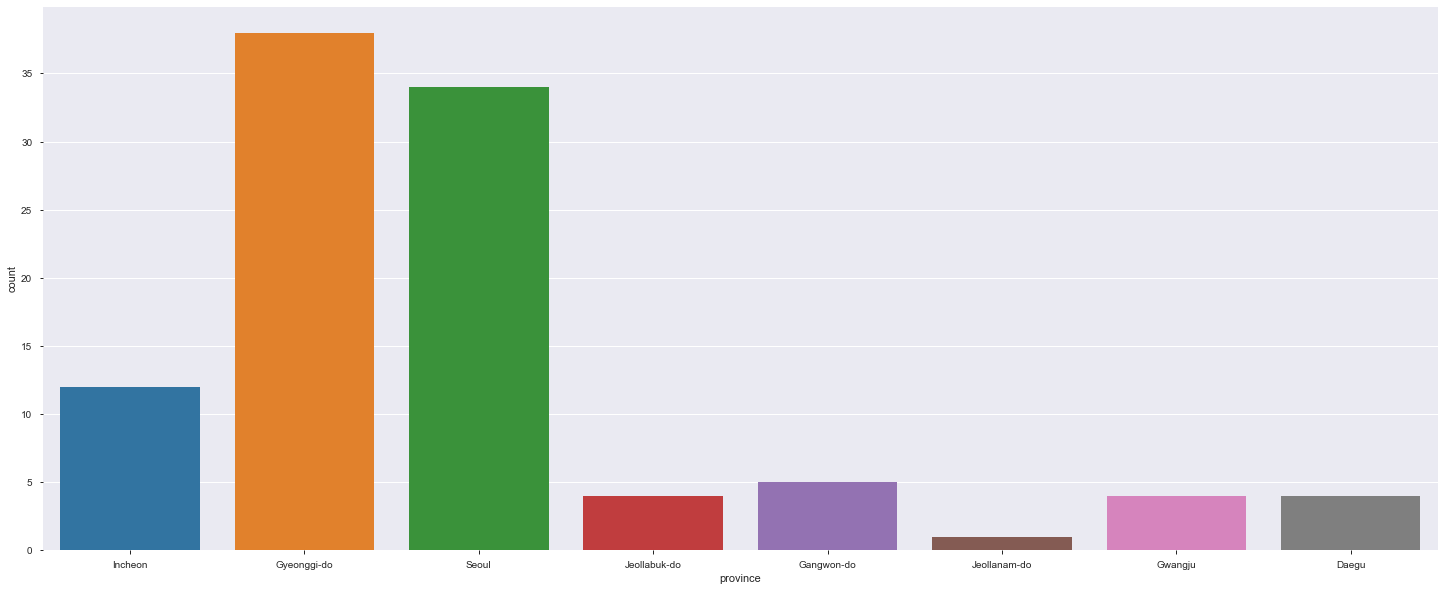

In [124]:
plt.figure(figsize=(25,10))
sns.countplot(route['province'])


In [115]:
col=route.columns
for co in col:
    print(co,'counting NULL:', route[co].isnull().sum())

id counting NULL: 0
date counting NULL: 0
province counting NULL: 0
city counting NULL: 0
visit counting NULL: 0
latitude counting NULL: 0
longitude counting NULL: 0


In [116]:
for co in col:
    print(co, route[co].unique(),'\n')

id [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

date ['2020-01-19' '2020-01-20' '2020-01-22' '2020-01-23' '2020-01-24'
 '2020-01-25' '2020-01-21' '2020-01-26' '2020-01-28' '2020-01-29'
 '2020-01-30' '2020-01-31' '2020-01-27' '2020-02-01' '2020-02-02'
 '2020-02-04' '2020-02-03' '2020-02-05' '2020-02-06'] 

province ['Incheon' 'Gyeonggi-do' 'Seoul' 'Jeollabuk-do' 'Gangwon-do'
 'Jeollanam-do' 'Gwangju' 'Daegu'] 

city ['Jung-gu' 'Seo-gu' 'Gimpo-si' 'Gangnam-gu' 'Goyang-si' 'Pyeongtaek-si'
 'Seongnam-si' 'Seongdong-gu' 'Seongbuk-gu' 'Jungnang-gu' 'Jongno-gu'
 'Seocho-gu' 'Gunsan-si' 'Bucheon-si' 'Gangneung-si' 'Suwon-si' 'Gunpo-si'
 'Muan-gun' 'Gwangsan-gu' 'Dong-gu' 'Suseong-gu' 'Buk-gu' 'Guri-si'
 'Gwangjin-gu' 'Songpa-gu' 'Yeonsu-gu' 'Yeongdeungpo-gu'] 

visit ['airport' 'hospital_isolated' 'clinic' 'hotel' 'store' 'restaurant'
 'cafe' 'etc' 'bus_terminal' 'movie_theater' 'hair_salon' 'hospital'
 'church' 'market' 'office' 'train_station' 'company'] 

latitude [37.460

In [146]:
rt = route.pivot_table(index="province", columns="visit", aggfunc="size")


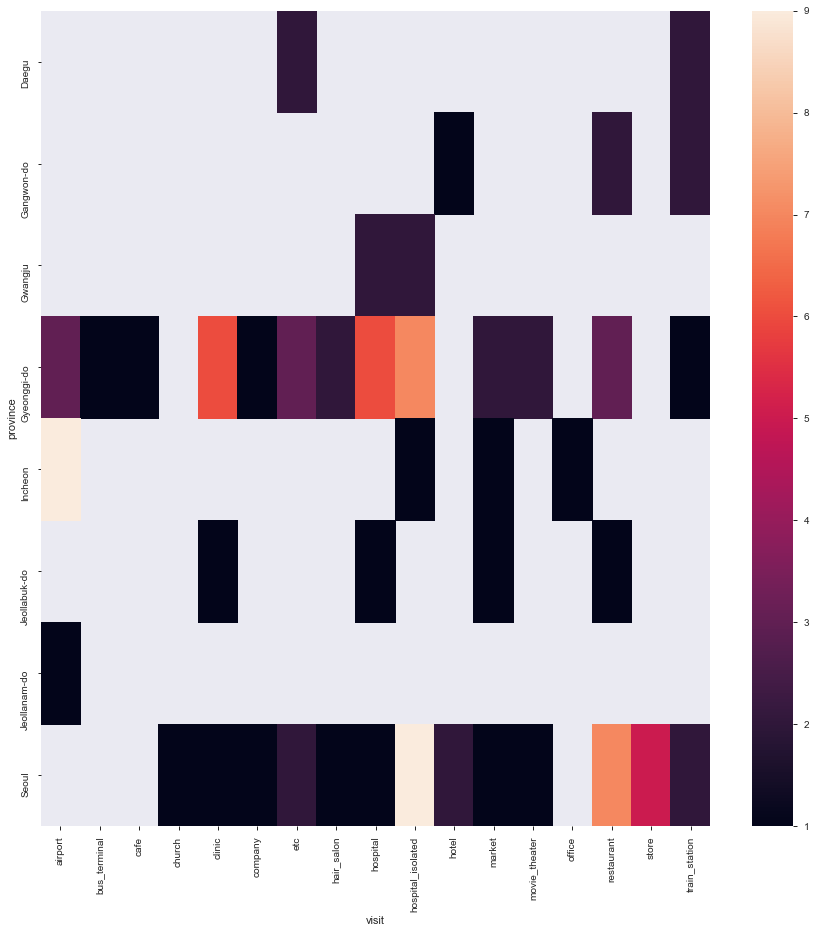

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(rt)

In [149]:
time.head()

,176,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [117]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
176              46 non-null object
acc_test         46 non-null int64
acc_negative     46 non-null int64
acc_confirmed    46 non-null int64
acc_released     46 non-null int64
acc_deceased     46 non-null int64
new_test         46 non-null int64
new_negative     46 non-null int64
new_confirmed    46 non-null int64
new_released     46 non-null int64
new_deceased     46 non-null int64
dtypes: int64(10), object(1)
memory usage: 4.1+ KB


In [129]:
print(time.columns)

Index(['176', 'acc_test', 'acc_negative', 'acc_confirmed', 'acc_released',
       'acc_deceased', 'new_test', 'new_negative', 'new_confirmed',
       'new_released', 'new_deceased'],
      dtype='object')


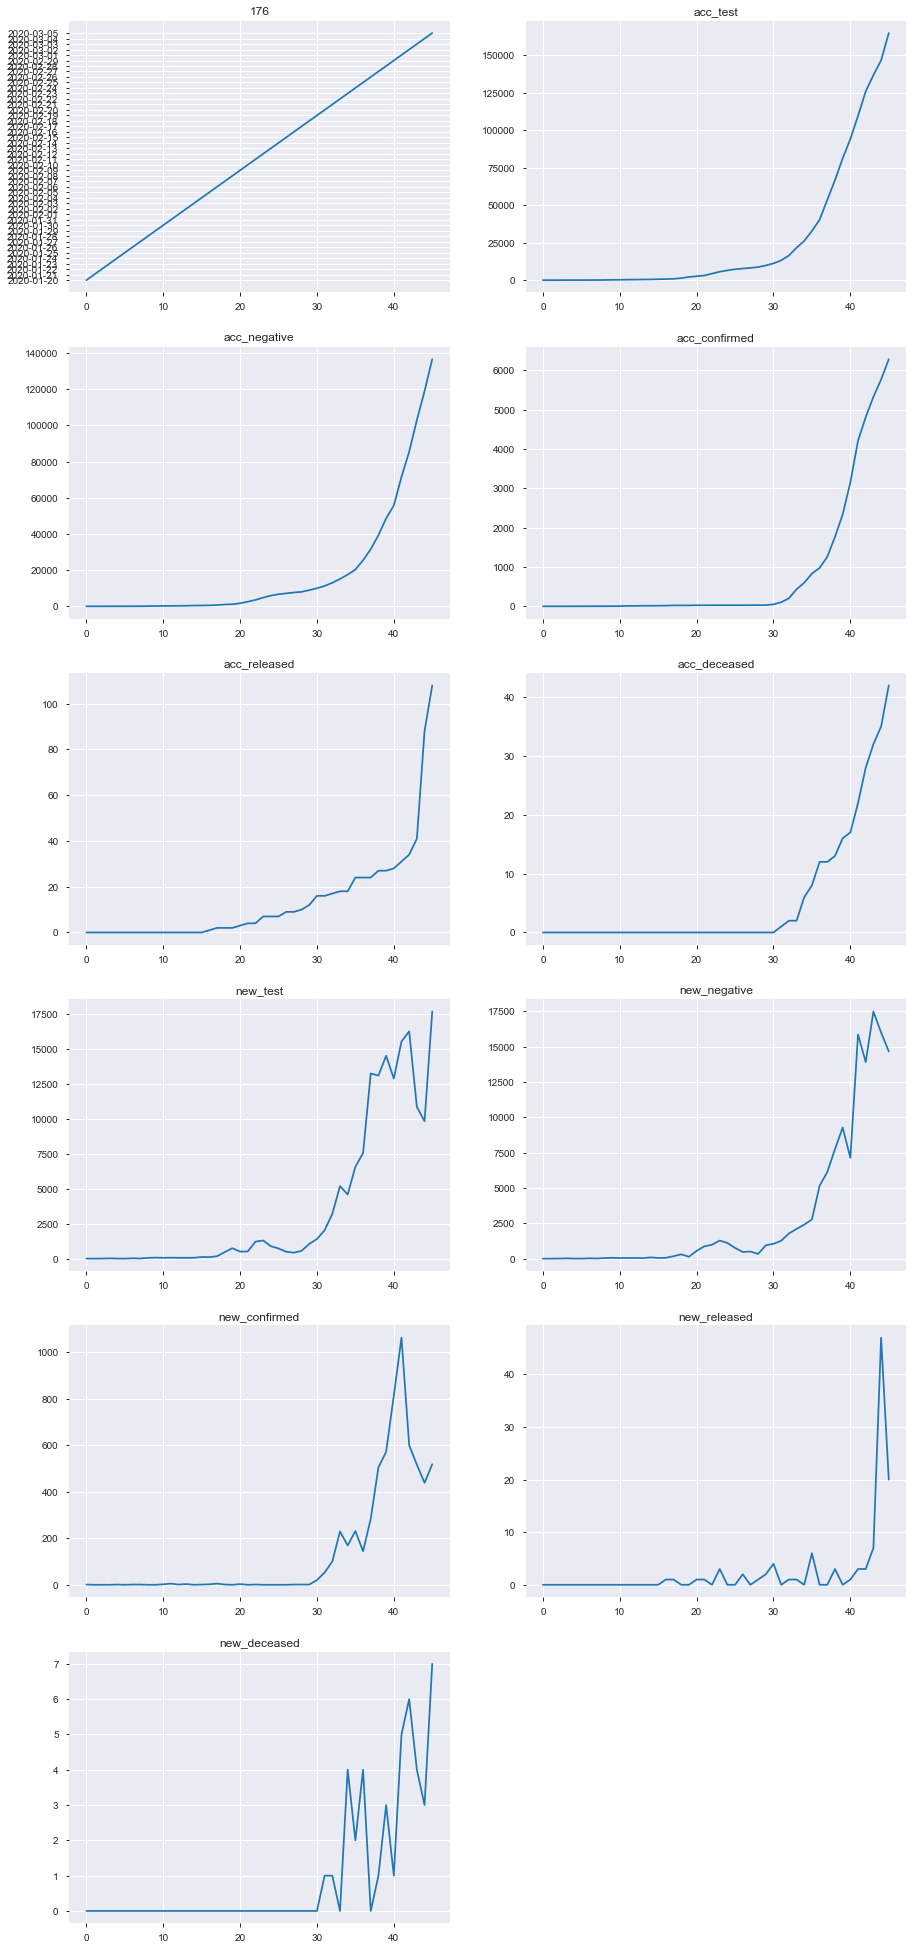

In [142]:
col=time.columns
leng=len(col)//2+1

plt.figure(figsize=(15,35))
for i, co in enumerate(col):
    plt.subplot(leng, 2 , i+1)
    plt.plot(time[co])
    plt.title(co)